In [125]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
# Define the URL of the Wikipedia page containing FIFA World Cup information
url = "https://www.jumia.com.ng/electronics/"
# Send a GET request to the specified URL and store the response
response = requests.get(url)

# Check if the request was successful (status code 200 indicates success)
if response.status_code == 200:
    # If successful, print a success message
    print("Successfully fetched the webpage!")
else:
    # If not successful, print a failure message
    print("Failed to fetch the webpage.")

Successfully fetched the webpage!


In [128]:
# Parse the content of the fetched webpage using BeautifulSoup
# The 'html.parser' is a built-in parser in Python for parsing HTML and XHTML documents
soup = BeautifulSoup(response.content, 'html.parser')

In [129]:
soup

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><title>Buy Quality Electronics at Affordable Prices Online | Jumia Nigeria</title><meta content="product" property="og:type"/><meta content="Jumia Nigeria" property="og:site_name"/><meta content="Buy Quality Electronics at Affordable Prices Online | Jumia Nigeria" property="og:title"/><meta content="Shop Quality Electronics like Smart TVs, home theatres, etc. at affordable prices on Jumia Nigeria - Shop Now! " property="og:description"/><meta content="/electronics/" property="og:url"/><meta content="https://ng.jumia.is/cms/jumialogonew.png" property="og:image"/><meta content="en_NG" property="og:locale"/><meta content="Buy Quality Electronics at Affordable Prices Online | Jumia Nigeria" name="title"/><meta content="index, follow" name="robots"/><meta content="Shop Quality Electronics like Smart TVs, home theatres, etc. at affordable prices on Jumia Nigeria - Shop Now! " name="description"/><link href="android-app://

In [133]:
#Collect data attributes including product names, categories, prices, availability status, and promotional details.
items = []

products = soup.find_all('article', class_ = "prd _fb col c-prd")
for product in products:
    name = product.find('h3', class_ = "name")
    product_name = name.text.strip() if name else "N/A"
    
    price = product.find('div', class_ = "prc")
    product_price = price.text.strip() if price else "N/A"

    availability = "in stock"

    promo = product.find('div', class_ = "bdg _dsct")
    promo_details = promo.text.strip() if promo else "N/A"

    items.append({
        'name': product_name,
        'price': product_price,
        'availability': availability,
        'promo': promo_details})

In [135]:
items

[{'name': "Hikers 32'' Frameless Android Smart HD LED TV - Black + 1 Year Warranty",
  'price': '₦ 159,000',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'Nexus 32" Inches FHD TV (H620B(SA) - Black + 2 Years Warranty',
  'price': '₦ 129,878',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'Zealot S67 Portable 60W Wireless Bluetooth Speaker',
  'price': '₦ 75,500',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'F&D HT330 Bluetooth Soundbar + Subwoofer - Black',
  'price': '₦ 205,000',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'F&D T-60X Pro Tower Bluetooth Speaker',
  'price': '₦ 350,500',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'Qsonic Bolan 2.1 Hometheater Cinematic SoundBar With SubWoofer',
  'price': '₦ 93,899',
  'availability': 'in stock',
  'promo': 'N/A'},
 {'name': 'Tedber Sinecraft Home Theater S22 Bluetooth SoundBar With Woofer.',
  'price': '₦ 93,340',
  'availability': 'in stock',
  'promo': 'N/A'},


In [137]:
df_items = pd.DataFrame(items)

# Display the DataFrame
df_items

,name,price,availability,promo
0,Hikers 32'' Frameless Android Smart HD LED TV ...,"₦ 159,000",in stock,N/A
1,"Nexus 32"" Inches FHD TV (H620B(SA) - Black + 2...","₦ 129,878",in stock,N/A
2,Zealot S67 Portable 60W Wireless Bluetooth Spe...,"₦ 75,500",in stock,N/A
3,F&D HT330 Bluetooth Soundbar + Subwoofer - Black,"₦ 205,000",in stock,N/A
4,F&D T-60X Pro Tower Bluetooth Speaker,"₦ 350,500",in stock,N/A
5,Qsonic Bolan 2.1 Hometheater Cinematic SoundBa...,"₦ 93,899",in stock,N/A
6,Tedber Sinecraft Home Theater S22 Bluetooth So...,"₦ 93,340",in stock,N/A
7,Mi+ 32 inches LED Tv (MI32DF1A) - Black + 1 Ye...,"₦ 96,392",in stock,N/A
8,Sonivia Bluetooth Home Theater SM11,"₦ 37,669",in stock,N/A
9,Hikers 32'' Frameless Android Smart HD LED TV ...,"₦ 132,746",in stock,N/A


In [139]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          40 non-null     object
 1   price         40 non-null     object
 2   availability  40 non-null     object
 3   promo         40 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [141]:
#Convert price data into numerical formats for analysis (Remove naira sign from specified columns so we can convert to numeric later).
specified_columns = ['price']
for col in specified_columns:
    df_items[col] = df_items[col].astype(str).str.replace('₦ ', '').str.replace(',','').str.strip()

In [166]:
numeric_columns = ['price']
df_items[numeric_columns] = df_items[numeric_columns].astype(pd.Int64Dtype())

In [190]:
import re
def extract_model(name):
    match = re.search(r'Hikers 43 ([A-Za-z0-9 ]+)',name)
    if match:
        return 'high grade' 
    match = re.search(r'F&D HT330 ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'high grade'
    match = re.search(r'Zealot ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'high grade'
    match = re.search(r'Nexus 32 ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'medium grade'
    match = re.search(r'UFC 43 ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'medium grade'
    match = re.search(r'itel ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'low grade'
    match = re.search(r'AGM Note ([A-Za-z0-9 ]+)',name)
    if match: 
        return 'low grade'
    return 'unknown'

In [192]:
df_items['Model_Category'] = df_items['name'].apply(extract_model)
df_items

,name,price,availability,promo,Model_Category
0,Hikers 32'' Frameless Android Smart HD LED TV ...,159000,in stock,N/A,unknown
1,"Nexus 32"" Inches FHD TV (H620B(SA) - Black + 2...",129878,in stock,N/A,unknown
2,Zealot S67 Portable 60W Wireless Bluetooth Spe...,75500,in stock,N/A,high grade
3,F&D HT330 Bluetooth Soundbar + Subwoofer - Black,205000,in stock,N/A,high grade
4,F&D T-60X Pro Tower Bluetooth Speaker,350500,in stock,N/A,unknown
5,Qsonic Bolan 2.1 Hometheater Cinematic SoundBa...,93899,in stock,N/A,unknown
6,Tedber Sinecraft Home Theater S22 Bluetooth So...,93340,in stock,N/A,unknown
7,Mi+ 32 inches LED Tv (MI32DF1A) - Black + 1 Ye...,96392,in stock,N/A,unknown
8,Sonivia Bluetooth Home Theater SM11,37669,in stock,N/A,unknown
9,Hikers 32'' Frameless Android Smart HD LED TV ...,132746,in stock,N/A,unknown


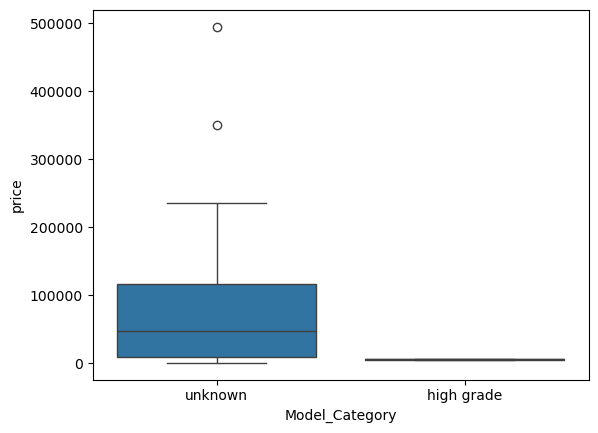

In [186]:
#Conduct exploratory data analysis (EDA) to uncover insights:
#Identify average pricing within each product category.
sns.boxplot(x="Model_Category", y="price", data=df_items, hue = 'Model_Category') #hue adds colours 
plt.show()